### 🤖 LLM and AI Agent Development Courses  
**✨ All courses available for just ₹399 INR / $9.99 USD ✨**

| Course | Description | Enroll |
|--------|-------------|---------|
| **🎯 Master OpenAI Agent Builder** | Build and deploy AI agents visually using OpenAI Agent Builder, ChatKit, RAG, Chatbot, AI Assistant with MCP, AWS, RDS MySQL | [Enroll Now](https://kgptalkie.com/agent-builder) |
| **🔥 MCP Mastery** | Build MCP servers & clients with Python, Streamlit, ChromaDB, LangChain, LangGraph agents, and Ollama integrations | [Enroll Now](https://kgptalkie.com/mcp) |
| **📊 Private Agentic RAG with LangChain** | Step-by-Step Guide to RAG with LangChain v1, LangGraph, and Ollama (Qwen3, Gemma3, DeepSeek-R1, LLAMA, FAISS) | [Enroll Now](https://kgptalkie.com/agentic-rag) |
| **🔧 Master LangGraph and LangChain** | Agentic RAG and Chatbot, AI Agent with LangChain v1, Qwen3, Gemma3, DeepSeek-R1, LLAMA 3.2, FAISS Vector Database | [Enroll Now](https://kgptalkie.com/langgraph) |
| **⚡ Master Langchain and Ollama** | Master Langchain v1, Local LLM Projects with Ollama, Qwen3, Gemma3, DeepSeek-R1, LLAMA 3.2, Complete Integration Guide | [Enroll Now](https://kgptalkie.com/langchain) |
| **🔬 Fine Tuning LLM** | Learn transformer architecture fundamentals and fine-tune LLMs with custom datasets | [Enroll Now](https://kgptalkie.com/fine-tuning-llm) |

---

### 🌐 Join the Community & Stay Connected

- 🔗 **Join the Discord Community:** https://discord.gg/RFjwbkNa  
- 📺 **Subscribe on YouTube (63K+ learners):** http://www.youtube.com/@KGPTalkie

---


## Langchain Getting Started

- Langchain Getting Started
    - Installation
    - Langsmith and Env setup
    - Environment Variables
    - Ollama Chat Model

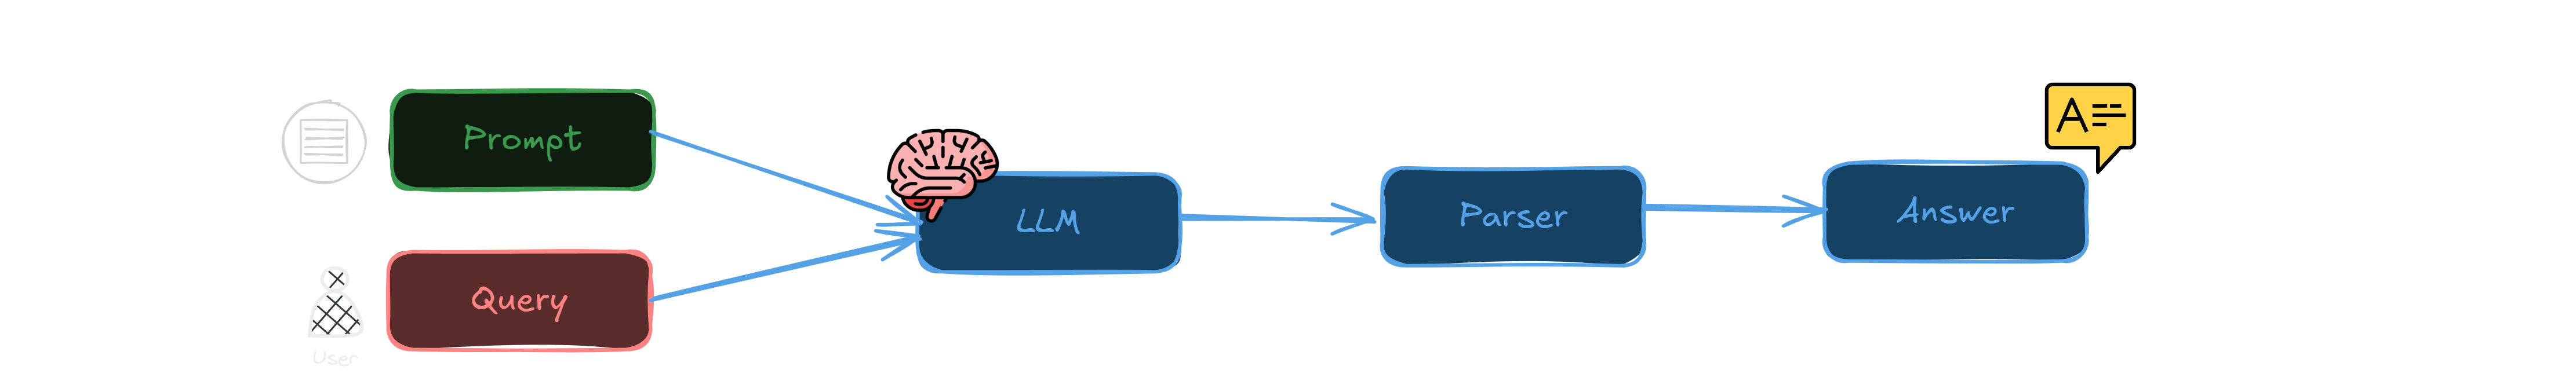

In [1]:
# Make sure you first pull the model using the ollama CLI
# ollama pull gemma3
# ollama pull <ollama_model_name> 
# deepseek-r1, qwen3:14b, llama3.2 etc

In [2]:
from dotenv import load_dotenv

load_dotenv()

True

### 1. Messages - The Building Blocks

In [3]:
from langchain_core.messages import HumanMessage, SystemMessage, AIMessage
from langchain_ollama import ChatOllama

In [4]:
llm = ChatOllama(model="gemma3",
                  base_url="http://localhost:11434",
                  temperature=0,
                  num_predict=1024,
                  num_ctx=2048)

In [5]:
messages = [
    SystemMessage("You are a helpful assistant."),
    HumanMessage(content="What is Langchain?"),
]

messages

[SystemMessage(content='You are a helpful assistant.', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='What is Langchain?', additional_kwargs={}, response_metadata={})]

In [6]:
response = llm.invoke(messages)

In [7]:
response.pretty_print()

================================== Ai Message ==================================

Okay, let's break down what Langchain is. In a nutshell, **Langchain is a framework designed to make it easier to build applications powered by large language models (LLMs) like GPT-3, GPT-4, and others.**

Here's a more detailed explanation, broken down into key aspects:

**1. The Problem Langchain Solves:**

* **LLMs are Powerful, but Complex:** Large language models are incredibly impressive, but they're not plug-and-play.  You need to do a *lot* of work to get them to do what you want consistently and reliably.  This includes things like:
    * **Prompt Engineering:** Crafting the *perfect* prompt to get the desired output. This is a surprisingly difficult skill.
    * **Managing Context:** LLMs have limited "memory." You need to figure out how to feed them relevant information from your data to help them answer questions or complete tasks.
    * **Chaining Together Operations:**  Often, you'll want t

### 2. Prompt Templates - Reusable Prompts


In [8]:
from langchain_core.prompts import ChatPromptTemplate

In [9]:
prompt = ChatPromptTemplate([
    ("system", "You are expert in {subject}. Explain it to a {audience} students."),
    ("human", "Can you explain {topic}?")
]
)

prompt

ChatPromptTemplate(input_variables=['audience', 'subject', 'topic'], input_types={}, partial_variables={}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=['audience', 'subject'], input_types={}, partial_variables={}, template='You are expert in {subject}. Explain it to a {audience} students.'), additional_kwargs={}), HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['topic'], input_types={}, partial_variables={}, template='Can you explain {topic}?'), additional_kwargs={})])

In [10]:
messages = prompt.invoke({
    "subject": "Physics",
    "audience": "high school",
    "topic": "Quantum Mechanics"
})
messages

ChatPromptValue(messages=[SystemMessage(content='You are expert in Physics. Explain it to a high school students.', additional_kwargs={}, response_metadata={}), HumanMessage(content='Can you explain Quantum Mechanics?', additional_kwargs={}, response_metadata={})])

In [11]:
response = llm.invoke(messages) 

In [12]:
response.pretty_print()

================================== Ai Message ==================================

Okay, let’s tackle Quantum Mechanics! It’s a notoriously weird and fascinating area of physics, and honestly, even physicists still debate some of its implications. I’ll break it down for you, aiming for a high school level understanding. 

**The Big Picture: Why We Need Quantum Mechanics**

Classical physics – Newton’s laws, electromagnetism – worked incredibly well for describing things we see every day: planets orbiting the sun, a ball rolling down a hill, etc. But when we started looking at the *really* small – atoms, electrons, and photons – classical physics just broke down. It couldn’t explain what was actually happening. 

**Here's the core idea: At the quantum level, things aren't as definite as they seem.**  Instead of being like tiny billiard balls with precise positions and velocities, particles like electrons behave in ways that are fundamentally probabilistic and uncertain.

**Key Concepts –

In [13]:
messages = prompt.invoke({
    "subject": "Physics",
    "audience": "Ph. D.",
    "topic": "Quantum Mechanics"
})
response = llm.invoke(messages) 
response.pretty_print()

================================== Ai Message ==================================

Okay, let’s dive into Quantum Mechanics. As you know, it’s fundamentally different from classical mechanics, and grappling with its core concepts requires a shift in perspective. I’ll aim for a level of detail suitable for a Ph.D. student, focusing on the key aspects and potential areas of contention.

**1. The Breakdown of Determinism:**

At its heart, Quantum Mechanics rejects the deterministic worldview of Newtonian mechanics. In classical mechanics, given the initial conditions (position and momentum) of a system, we can, in principle, predict its future trajectory with perfect accuracy. Quantum Mechanics throws this out the window. Instead, it describes the *probability* of finding a particle in a particular state. This isn't a limitation of our knowledge; it’s a fundamental property of the universe.

**2. The Wave-Particle Duality:**

This is arguably the most perplexing aspect. Quantum objects – el

### 3. LCEL - Chains with Pipe Operator


In [14]:
# invoke -> langchain runnable
chain = prompt | llm

In [15]:
response = chain.invoke({"subject": "Physics",
                      "audience": "middle school",
                      "topic": "Relativity"})



In [16]:
response.pretty_print()

================================== Ai Message ==================================

Okay, let’s tackle Relativity! It’s a really cool and sometimes mind-bending idea, but we can break it down. It’s actually two related theories developed by Albert Einstein, and they changed the way we think about space and time. 

**Basically, Relativity says that space and time aren't absolute – they're relative to the observer!** That means how we measure them depends on how fast we're moving. 

Let’s look at the two parts:

**1. Special Relativity (1905): The Speed of Light is Key**

* **The Problem Before Einstein:** Before Einstein, scientists thought that if you threw a ball forward while on a moving train, the ball's speed relative to the ground would be the speed of the train plus the speed you threw it. Simple, right?
* **Einstein's Big Idea:** Einstein realized that this didn't work for light! He said that the speed of light in a vacuum (empty space) is *always* the same for *everyone*, no matt

### 4. Adding Output Parsers


In [17]:
from langchain_core.output_parsers import StrOutputParser

In [18]:
# invoke -> langchain runnable
chain = prompt | llm | StrOutputParser()

In [19]:
response = chain.invoke({"subject": "Physics",
                      "audience": "middle school",
                      "topic": "Relativity"})

In [20]:
print(response)

Okay, let’s tackle Relativity! It’s a really cool and sometimes mind-bending idea from Albert Einstein, and it’s actually two related theories: **Special Relativity** and **General Relativity**. Don’t worry, we’ll break it down step-by-step.

**1. Special Relativity (The Easy Part - Mostly!)**

Imagine you're on a train moving smoothly at a constant speed. You toss a ball straight up in the air and catch it. To *you*, it just goes straight up and down. Simple, right?

Now, imagine someone standing *outside* the train watching you. To *them*, the ball isn't just going up and down. It's also moving forward with the train! 

That’s the basic idea behind relativity: **motion is relative**.  It depends on your point of view – your *frame of reference*.

Einstein realized something even more profound:

* **The Speed of Light is Constant:** This is the really weird part.  The speed of light in a vacuum (empty space) is *always* the same, no matter how fast you're moving towards or away from t

### 5. Streaming Responses and Structured Output (Pydantic)


In [46]:
from pydantic import BaseModel, Field

In [47]:
class Sentiment(BaseModel):
    sentiment:bool = Field(..., description="True if the sentiment is positive, False otherwise")
    reasoning:str = Field(..., description="A brief explanation of the sentiment")




In [48]:
structured_llm = llm.with_structured_output(Sentiment)

In [50]:
response = structured_llm.invoke("I love programming!")
response

Sentiment(sentiment=True, reasoning='The user stated "I love programming!" which expresses a positive emotion and enthusiasm for the activity of programming. This clearly indicates a positive sentiment.')

In [52]:
response.model_dump()

{'sentiment': True,
 'reasoning': 'The user stated "I love programming!" which expresses a positive emotion and enthusiasm for the activity of programming. This clearly indicates a positive sentiment.'}

In [59]:
for chunk in structured_llm.stream("I love programming!"):
    print(chunk, end='', flush=True)

sentiment=True reasoning=''sentiment=True reasoning='The'sentiment=True reasoning='The user'sentiment=True reasoning='The user stated'sentiment=True reasoning='The user stated "'sentiment=True reasoning='The user stated "I'sentiment=True reasoning='The user stated "I love'sentiment=True reasoning='The user stated "I love programming'sentiment=True reasoning='The user stated "I love programming!'sentiment=True reasoning='The user stated "I love programming!"'sentiment=True reasoning='The user stated "I love programming!" which'sentiment=True reasoning='The user stated "I love programming!" which expresses'sentiment=True reasoning='The user stated "I love programming!" which expresses a'sentiment=True reasoning='The user stated "I love programming!" which expresses a positive'sentiment=True reasoning='The user stated "I love programming!" which expresses a positive emotion'sentiment=True reasoning='The user stated "I love programming!" which expresses a positive emotion and'sentiment=Tru

In [68]:
for chunk in llm.stream("I love programming! write a poem about it"):
    print(chunk.content, end='', flush=True)

Okay, here's a poem about programming, aiming to capture the joy and challenge:

**The Code Weaver's Song**

The screen glows softly, a digital hue,
A blank expanse, waiting for me and you.
With fingers poised, a logic starts to flow,
A world of symbols, ready to grow.

I build with brackets, loops, and functions bright,
Constructing pathways, bathed in pixel light.
Each line a step, a carefully placed plea,
To coax a system, wild and truly free.

Debugging whispers, a frustrating call,
A misplaced comma, threatening to fall.
But patience blooms, a methodical quest,
To find the error, put logic to the test.

The compiler hums, a satisfying sound,
As code transforms, on solid ground.
A program runs, a beautiful display,
Born from my thoughts, in a digital way.

It’s more than numbers, more than just command,
It’s shaping futures, with a skillful hand.
A code weaver’s song, a creative art,
Building a new world, a brand new start. 

---

Would you like me to:

*   Try a different style (e